**МОДЕЛЬ МОНЕТИЗАЦИИ ИГРОВОГО ПРИЛОЖЕНИЯ**

[Презентация] https://disk.yandex.ru/i/LSHr3HPTi68QVg

[Дашборд] https://public.tableau.com/views/_16614241884380/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

### Описание проекта

**Задача**:

Проанализируйте поведения игроков в зависимости от источника перехода.

- Проведите исследовательский анализ данных;
- Проанализируйте влияние источника перехода в игру на поведение пользователя;
- Проверьте статистические гипотезы
    1. *Проверьте гипотезу: время завершения уровня различается в зависимости способа прохождения:*
        - *через реализацию проекта,*
        - *через победу над первым игроком.*
    2. *Сформулируйте собственную статистическую гипотезу. Дополните её нулевой и альтернативной гипотезами. Проверьте гипотезу с помощью статистического теста.*

**Описание датасетов:**

Основной датасет содержит данные о событиях, совершенных в мобильной игре «Космические братья». В ней пользователи строят свою космическую программу и пытаются преуспеть в нелёгком деле колонизации галактики.

Основная монетизация игры — только планируется. Но предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки.

В датасете представлены данные по игре пользователей на первом уровне. Завершение первого уровня требует от игрока выполнения одного из двух условий:

- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников

В датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

Датасет *game_actions.csv*:

- `event_datetime` — время события;
- `event` — одно из трёх событий:
    1. `building` — объект построен,
    2. `finished_stage_1` — первый уровень завершён,
    3. `project` — проект завершён;
- `building_type` — один из трёх типов здания:
    1. `assembly_shop` — сборочный цех,
    2. `spaceport` — космопорт,
    3. `research_center` — исследовательский центр;
- `user_id` — идентификатор пользователя;
- `project_type` — тип реализованного проекта;

Помимо основного датасета есть два датасета с информацией о рекламных активностях. Они также помогут в решении задачи.

Датасет *ad_cost.csv*:

- `day` - день, в который был совершен клик по объявлению
- `source` - источник трафика
- `cost` - стоимость кликов

Датасет user_source.csv содержит колонки:

- `user_id` - идентификатор пользователя
- `source` - источников, с которого пришёл пользователь, установивший приложение

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно **обязательно** в формате **pdf,** прикрепив ссылку на файл в основном проекте.

**Датасеты:**

[ad_costs.csv](https://disk.yandex.ru/d/PjE2POcSyDSoVQ)

[game_actions.csv](https://disk.yandex.ru/d/d0326TvVybgbVQ)

[user_sourse.csv](https://disk.yandex.ru/d/VlmspW1CYuC8Lg)

**Дашборды**

Чтобы отправить дашборд, приложите к проекту ссылку на файл. Выполните один из наборов:

1. Набор №1
    1. Постройте диаграмму распределения количества построенных объектов
    2. Добавьте индикатор количества пользователей
    3. Добавьте фильтр дашборда по признаку завершения уровня
2. Набор №2
    1. Постройте диаграмму, отображающую количество событий по дням
    2. Постройте гистограмму, отображающую количество пользователей, пришедших из разных источников
    3. Добавьте фильтр дашборда по типу события

###  Декомпозиция

**Шаг 1.** Загрузка  и подготовка данных
- Таблица game_actions
- Таблица ad_costs
- Таблица user_source

**Шаг 2.** Исследовательский анализ данных
- Среднее время прохождения уровня
- Количество построек на каждого пользователя
- Сколько раз за день пользователи в среднем заходят в мобильное приложение
- Показатели вовлечённости - DAU, WAU, Sticky Factor
- Коэффициент удержания Retention Rate
- Стоимость привлечения клиента CAC

**Шаг 3.** Проверка статистических гипотез
- Гипотеза различия времени прохождения уровня
- Гипотеза различия количества построенных зданий

**Шаг 4.** Формулирование модели монетизации и выводов
- Модель монетизации
- Общий вывод 

### Шаг.1  Загрузка  и подготовка данных к исследованию

#### Загрузка данных

In [1]:
#импортируем библиотеку pandas
import pandas as pd

#импортируем библиотеку numpy
import numpy as np

#импортируем библиотеку stats для работы со статистикой
from scipy import stats as st

#для создания графиков и гистограмм импортируем библиотеку matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

#импортируем библиотеку seaborn
import seaborn as sns

#импортируем библиотеку plotly
from plotly import graph_objects as go

import plotly.express as px


#импортируем библиотеку warnings, чтобы скрыть возникающие предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
# загрузим датасеты
ad_costs = pd.read_csv('/datasets/ad_costs.csv')
game_actions = pd.read_csv('/datasets/game_actions.csv')
user_source = pd.read_csv('/datasets/user_source.csv')

In [3]:
#получим общую информацию о таблицах
for item, name in [(game_actions, 'game_actions'), (ad_costs, 'ad_costs'), (user_source, 'user_source')]:
    print('Первые пять строк таблицы', name, ':')
    display(item.head())
    
    print()
    
    print('Общая информация о таблице', name, ':')
    item.info()
    print('*'*50)

Первые пять строк таблицы game_actions :


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN



Общая информация о таблице game_actions :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB
**************************************************
Первые пять строк таблицы ad_costs :


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796



Общая информация о таблице ad_costs :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes
**************************************************
Первые пять строк таблицы user_source :


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads



Общая информация о таблице user_source :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB
**************************************************


Вывод:

 - Таблица game_actions - данные первых пользователей приложения.
 В таблице actions пять столбцов, количество значений в столбцах отличается: в столбцах event_datetime, event, user_id количество значений одинаковое и составляет 135640, в столбце building_type количество значений меньше и составляет 127957, в столбце project_type значений меньше всего, - 1866. 
 Заменять пропущенные значения не будем, чтобы не испортить общую картину, а рассмотрим датасет как есть.
 Типы данные везде те, кроме столбца с datetime. А вот пропуски есть в building_type (это ожидаемо, поскольку некоторые event не подразумевают постройку) и project_type (тоже очевидно, не все выполнили проект).
 
-  Таблица ad_costs - информация о рекламных активностях.
В таблице ad_costs три столбца, в столбцах day, source, cost количество значений одинаковое и составляет 28.

- Таблица user_source - информация о рекламных активностях.
user_id - идентификатор пользователя
source - источников, с которого пришёл пользователь, установивший приложение
В таблице user_source два столбца, в столбцах user_id, source количество значений одинаковое и составляет 13576 .

#### Подготовка данных к исследованию

Проверим таблицы на дубликаты

In [4]:
#посчитаем количество дубликатов в каждой таблице

for item, name in [(game_actions, 'game_actions'), (ad_costs, 'ad_costs'), (user_source, 'user_source')]:
    print('Количество дубликатов в таблице', name, ':', item.duplicated().sum())

Количество дубликатов в таблице game_actions : 1
Количество дубликатов в таблице ad_costs : 0
Количество дубликатов в таблице user_source : 0


In [5]:
#удалим дубликаты в таблице game_actions

game_actions = game_actions.drop_duplicates()

print('Количество дубликатов в таблице game_actions', ':', game_actions.duplicated().sum())

Количество дубликатов в таблице game_actions : 0


Рассмотрим подробнее таблицы

##### Таблица game_actions с данными первых пользователей приложения

In [6]:
# посмотрим game_actions через describe() для наглядности:
# уникальные значения , их на наиболее частые значения
# минимальное и максимальное значение в столбце 'event_datetime'

game_actions.describe()

,event_datetime,event,building_type,user_id,project_type
count,135639,135639,127956,135639,1866
unique,128790,3,3,13576,1
top,2020-05-08 22:30:04,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,satellite_orbital_assembly
freq,4,127956,59325,22,1866


**Столбец event_datetime - время события**

In [7]:
#посмотрим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца event_datetime:')
print(game_actions['event_datetime'].isnull().sum())

Cуммарное количество пропусков для столбца event_datetime:
0


In [8]:
#скорректируем формат отображения дат для столбца

game_actions['event_datetime'] = pd.to_datetime(game_actions['event_datetime'], format='%Y-%m-%dT%H:%M:%S')
game_actions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135639 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   event_datetime  135639 non-null  datetime64[ns]
 1   event           135639 non-null  object        
 2   building_type   127956 non-null  object        
 3   user_id         135639 non-null  object        
 4   project_type    1866 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 6.2+ MB


In [9]:
# выделим в отдельные столбцы полную дату и неделю
# посмотрим первые пять строк таблицы после добавления столбцов
game_actions['event_date']  = game_actions['event_datetime'].dt.date
game_actions['event_week']  = game_actions['event_datetime'].dt.week

game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,19
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,19
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,19


Вывод

- Cуммарное количество пропусков для столбца event_datetime равно нулю, пропущенных значений нет, подозрительных значений не наблюдается,
- Количество уникальных значений в столбце = 128790,
- Период, за который представлены данные в столбце, - с 4 мая по 5 июня 2020 включительно:
- Максимальное значение даты и времени - 2020-05-04 00:00:01,
- Максимальное значение даты и времени - 2020-06-05 12:32:49.

При этом по условию задачи сказано, что в датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно. Получается, в датасете представлены все действия пользователей, которые скачали приложение и начали играть с 4 по 10 мая и играли до 5 июня

**Столбец event - событие**

In [10]:
# посмотрим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца event:')
print(game_actions['event'].isnull().sum())

Cуммарное количество пропусков для столбца event:
0


In [11]:
# распределим уникальные значения в столбце
# посмотрим, как распределены уникальные пользователи

print(game_actions['event'].value_counts())

event_user_id = game_actions.groupby('event').agg({'user_id':'nunique'}).reset_index().sort_values(by = 'user_id', ascending = False)
event_user_id

building            127956
finished_stage_1      5817
project               1866
Name: event, dtype: int64


,event,user_id
0,building,13576
1,finished_stage_1,5817
2,project,1866


In [12]:
# подсчитаем % завершивших первый уровень

print('Процент завершивших первый уровень: {:.2%}'.format(event_user_id['user_id'].loc[1]/event_user_id['user_id'].loc[0]))

Процент завершивших первый уровень: 42.85%


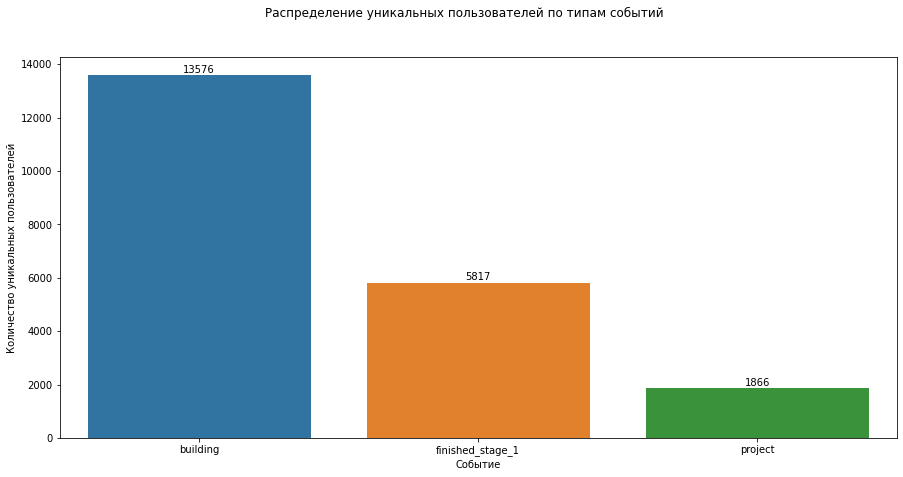

In [13]:
# построим график распределения уникальных пользователей

plt.figure(figsize=(15,7))
ax = sns.barplot(data=event_user_id, x='event', y='user_id')
plt.suptitle('Распределение уникальных пользователей по типам событий')
plt.xlabel('Событие')
plt.ylabel('Количество уникальных пользователей')
sns.set_palette('dark') 

#добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center")

Вывод

Cуммарное количество пропусков для столбца event равно нулю, пропущенных значений нет, подозрительных значений не наблюдается. Корректировки вносить не будем. Тип данных не меняем.
 
 Данные распределены по событиям:
- building (объект построен) = 127956 значений
- finished_stage_1 (первый уровень завершён) = 5817 значений
- project (проект завершён) = 1866 значений

Уникальные пользователи распределены по событиям:
- building (объект построен) = 13576 пользователей
- finished_stage_1 (первый уровень завершён) = 5817 пользователей
- project (проект завершён) = 1866 пользователей

По условию задачи в датасете представлены данные по игре пользователей на первом уровне, и завершение первого уровня требует от игрока выполнения одного из двух условий: "победа над первым врагом" или
"реализация проекта" - разработка орбитальной сборки спутников. Целевое событие - завершение первого уровня 

_Таким образом, первый уровень завершён у 5817 пользователей. Процент завершивших первый уровень составляет 42.85%. Из них 1866 пользователей завершили уровень через реализацию проекта (разработку орбитальной сборки спутников). А 5817 - 1866 = 3951 завершили уровень через победу над первым врагом. Т.е. способ прохождения уровня через победу над врагом пользователи предпочитают больше, чем разработку орбитальной сборки спутников._

In [14]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца building_type:')
print(game_actions['building_type'].isnull().sum())

Cуммарное количество пропусков для столбца building_type:
7683


In [15]:
# выделим уникальные значения в столбце
# посмотрим на их рааспределение 

print('Уникальные значения в столбце building_type:')
print(game_actions['building_type'].value_counts())

building_type_user_id = game_actions.groupby('building_type').agg({'user_id':'nunique'}).reset_index().sort_values(by = 'user_id', ascending = False)
building_type_user_id

Уникальные значения в столбце building_type:
spaceport          59325
assembly_shop      54494
research_center    14137
Name: building_type, dtype: int64


,building_type,user_id
0,assembly_shop,13576
2,spaceport,13231
1,research_center,7671


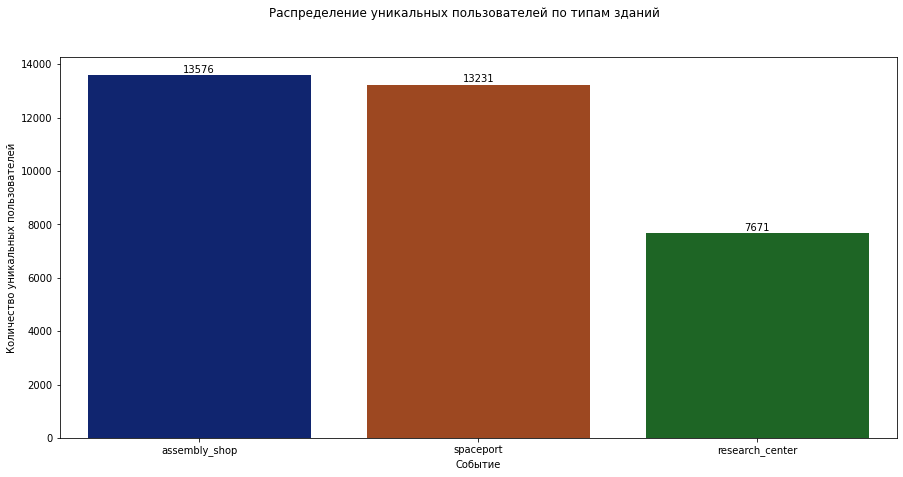

In [16]:
# построим график распределения уникальных пользователей

plt.figure(figsize=(15,7))
ax = sns.barplot(data= building_type_user_id, x='building_type', y='user_id')
plt.suptitle('Распределение уникальных пользователей по типам зданий')
plt.xlabel('Событие')
plt.ylabel('Количество уникальных пользователей')
sns.set_palette('dark') 

# добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 100,
            '{:1.0f}'.format(height),
            ha="center")

**Столбец user_id - идентификатор пользователя**

In [17]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца user_id:')
print(game_actions['user_id'].isnull().sum())

Cуммарное количество пропусков для столбца user_id:
0


Вывод

Cуммарное количество пропусков для столбца user_id равно нулю, пропущенных значений нет.
Из destribe() game_action можем вывести:
- Количество уникальных пользователей - 13576.
- наиболее частое число уникальных событий в столбце - 22.

**Столбец project_type - тип реализованного проекта**

In [18]:
# получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца project_type:')
print(game_actions['project_type'].isnull().sum())

Cуммарное количество пропусков для столбца project_type:
133773


Вывод

Cуммарное количество пропусков для столбца project_type равно 133773.(Корректировки вносить не будем, тип данных не меняем.)

Из destribe() game_action видим в столбце только один тип реализованного объекта:
- satellite_orbital_assembly (разработка орбитальной сборки спутников) = 1866.

##### Таблица ad_costs с информацией о рекламных активностях

In [19]:
# распечатаем таблицу с расходами
ad_costs.head()

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


**Столбец source - источник трафика**

In [20]:
#получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца source:')
print(ad_costs['source'].isnull().sum())

Cуммарное количество пропусков для столбца source:
0


In [21]:
#выделим уникальные значения в столбце

print('Уникальные значения в столбце source:')
print(ad_costs['source'].value_counts())

Уникальные значения в столбце source:
yandex_direct              7
facebook_ads               7
instagram_new_adverts      7
youtube_channel_reklama    7
Name: source, dtype: int64


Вывод

Cуммарное количество пропусков для столбца source равно нулю.

Уникальные источники трафика:
- yandex_direct = 7
- instagram_new_adverts = 7
- youtube_channel_reklama = 7
- facebook_ads = 7

**Столбец day - день, в который был совершен клик по объявлению**

In [22]:
# получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца day:')
print(ad_costs['day'].isnull().sum())

Cуммарное количество пропусков для столбца day:
0


In [23]:
# скорректируем формат отображения дат для столбца

ad_costs['day'] = pd.to_datetime(ad_costs['day'], format='%Y-%m-%d')

In [24]:
# получим числовое описание данных (список характерных значений) для столбца через describe()

print(ad_costs['day'].describe())

count                      28
unique                      7
top       2020-05-05 00:00:00
freq                        4
first     2020-05-03 00:00:00
last      2020-05-09 00:00:00
Name: day, dtype: object


Вывод

Cуммарное количество пропусков для столбца day равно нулю.

Количество уникальных значений в столбце = 7.

Период, за который представлены данные в столбце, - с 3 мая по 9 мая 2020 включительно.

**Столбец cost - стоимость кликов**

In [25]:
# получим суммарное количество пропусков для столбца

print('Cуммарное количество пропусков для столбца cost:')
print(ad_costs['cost'].isnull().sum())

Cуммарное количество пропусков для столбца cost:
0


In [26]:
# получим числовое описание данных (список характерных значений) для столбца  через describe()

print(ad_costs['cost'].describe())

count     28.000000
mean     271.556321
std      286.867650
min       23.314669
25%       66.747365
50%      160.056443
75%      349.034473
max      969.139394
Name: cost, dtype: float64


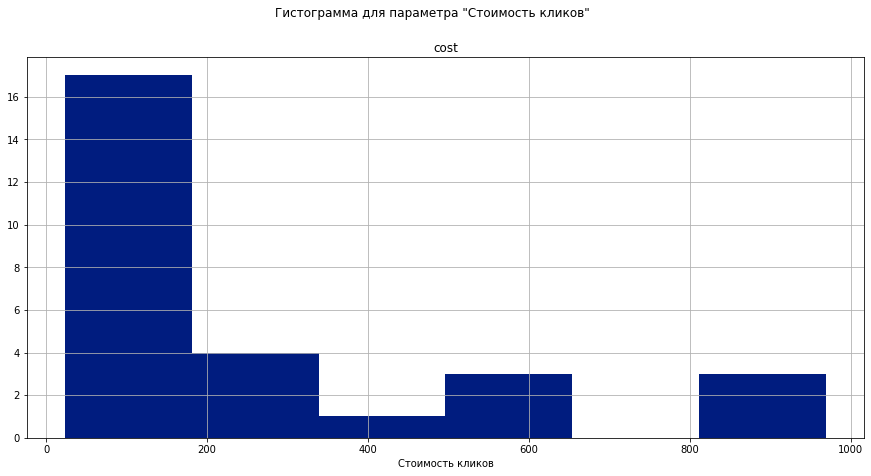

In [27]:
# построим гистограмму для параметра стоимость кликов

ad_costs.hist('cost', figsize=(15,7), bins = 'auto')
plt.suptitle('Гистограмма для параметра "Стоимость кликов"')
plt.xlabel('Стоимость кликов')
plt.show()

In [28]:
# посмотрим, как распределена стоимость по источникам трафика

source_cost = ad_costs.groupby('source').agg({'cost':'sum'}).reset_index().sort_values(by = 'cost', ascending = False)
source_cost

,source,cost
2,yandex_direct,2233.111449
1,instagram_new_adverts,2161.441691
0,facebook_ads,2140.904643
3,youtube_channel_reklama,1068.119204


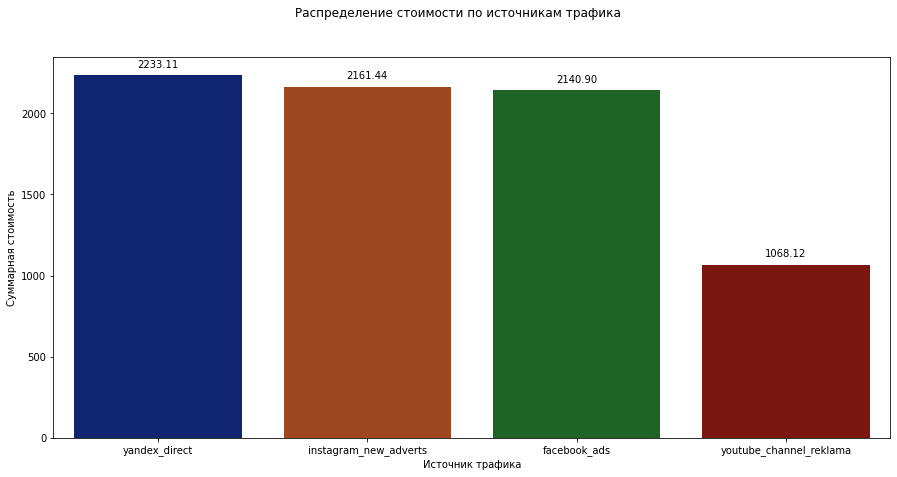

In [29]:
# построим график распределения стоимости по источникам трафика

plt.figure(figsize=(15,7))
ax = sns.barplot(data= source_cost, x='source', y='cost')
plt.suptitle('Распределение стоимости по источникам трафика')
plt.xlabel('Источник трафика')
plt.ylabel('Суммарная стоимость')
sns.set_palette('dark') 

#добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 50,
            '{:1.2f}'.format(height),
            ha="center")

Вывод

Cуммарное количество пропусков для столбца cost равно нулю.

Количество уникальных значений в столбце = 28.
- Максимальная стоимость кликов = 969.13
- Минимальная стоимость кликов = 23.31
- Среднее значение стоимости кликов = 271.55
- Медианное значение стоимости кликов = 160.05

Распределение стоимости кликов по источникам трафика:
- yandex_direct = 2233.11
- instagram_new_adverts = 2161.44
- facebook_ads = 2140.90
- youtube_channel_reklama = 1068.11

_Таким образом, наибольший дневной бюджет канала приходится на источник трафика yandex_direct, на втором месте instagram_new_adverts, на третьем месте facebook_ads, а меньше всего - на youtube_channel_reklama._

##### Таблица user_source с информацией о рекламных активностях

In [30]:
# распечатаем таблицу сс помощью deacribe()

user_source.describe()

,user_id,source
count,13576,13576
unique,13576,4
top,bd193431-316f-473c-8be6-ee8683ef2516,yandex_direct
freq,1,4817


**Столбец user_id - идентификатор пользователя**

In [31]:
# проверим количество пропусков для столбца

print('Cуммарное количество пропусков для столбца user_id:')
print(user_source['user_id'].isnull().sum())

Cуммарное количество пропусков для столбца user_id:
0


Cуммарное количество пропусков для столбца user_id равно нулю.

Количество уникальных пользователей - 13576.

**Столбец source - источник, с которого пришёл пользователь, установивший приложение**

In [32]:
# выделим уникальные значения в столбце
#посмотрим, как распределены уникальные пользователи
print('Уникальные значения в столбце source:')
print(user_source['source'].value_counts())

source_user_id = user_source.groupby('source').agg({'user_id':'nunique'}).reset_index().sort_values(by = 'user_id', ascending = False)
source_user_id

Уникальные значения в столбце source:
yandex_direct              4817
instagram_new_adverts      3347
facebook_ads               2726
youtube_channel_reklama    2686
Name: source, dtype: int64


,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


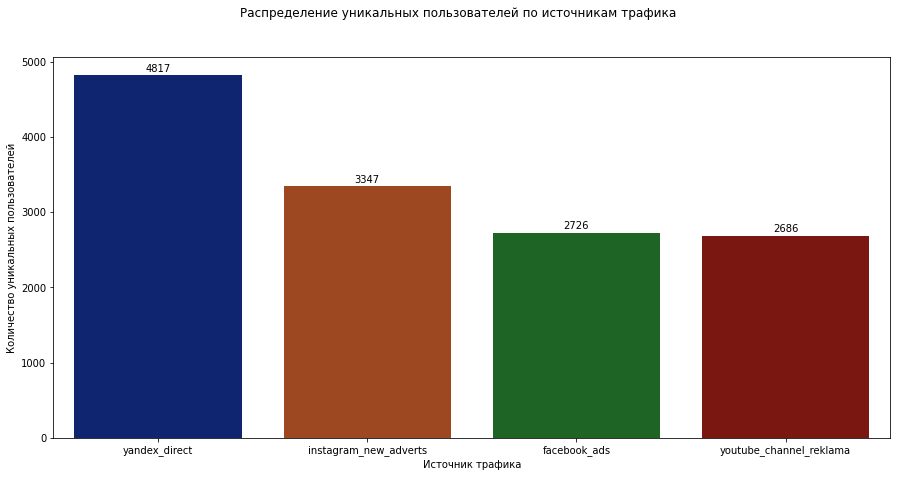

In [33]:
# построим график распределения стоимости по источникам трафика

plt.figure(figsize=(15,7))
ax = sns.barplot(data= source_user_id, x='source', y='user_id')
plt.suptitle('Распределение уникальных пользователей по источникам трафика')
plt.xlabel('Источник трафика')
plt.ylabel('Количество уникальных пользователей')
sns.set_palette('dark') 

#добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 50,
            '{:1.0f}'.format(height),
            ha="center")

Вывод 

Cуммарное количество пропусков для столбца source равно нулю.

Распределение уникальных пользователей по источникам трафика:
- yandex_direct = 4817 пользователей
- instagram_new_adverts = 3347 пользователей
- facebook_ads = 2726 пользователей
- youtube_channel_reklama = 2686 пользователей.

Аналогично распределению стоимости кликов, больше всего пользователей приходится на источник трафика yandex_direct, на втором месте instagram_new_adverts, на третьем месте facebook_ads, а меньше всего - на youtube_channel_reklama.

**Вывод**:

В качестве исходных данных были предоставлен датасет с данными первых пользователей приложения и два дополнительных датасета с информацией о рекламных активностях.Целевое событие - завершение первого уровня.

На данном шаге открыли файлы с исходными данными и изучили общую информацию по каждой таблице. Проверили таблицы на наличие
- Дубликаты - обнаружены в таблице game_actions составляет 1, исключен.  
- Пропуски - обнаружены лишь в столбцаз project_type равно 133773, building_type - 7683.Пропуски не зполняли.

**Таблица `game_actions`:**

- Столбец event_datetime - время события

Период, за который представлены данные в столбце, - с 4 мая по 5 июня включительно:

    - Максимальное значение даты и времени - 2020-05-04 00:00:01
    - Максимальное значение даты и времени - 2020-06-05 12:32:49

При этом по условию задачи сказано, что в датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

- Столбец event - событие

Распределение данных по событиям:

    - building (объект построен) = 127956 значений
    - finished_stage_1 (первый уровень завершён) = 5817 значений
    - project (проект завершён) = 1866 значений

Распределение уникальных пользователей по следующим событиям:

    - building (объект построен) = 13576 пользователей
    - finished_stage_1 (первый уровень завершён) = 5817 пользователей
    - project (проект завершён) = 1866 пользователей

По условию задачи в датасете представлены данные по игре пользователей на первом уровне, и завершение первого уровня требует от игрока выполнения одного из двух условий: "победа над первым врагом" или
"реализация проекта" - разработка орбитальной сборки спутников
Целевое событие - завершение первого уровня. 

_Таким образом, первый уровень завершён finished_stage_1 у 5817 пользователей. Процент завершивших первый уровень составляет 42.85%. Из них 1866 пользователей завершили уровень через реализацию проекта project (разработку орбитальной сборки спутников). А 5817 - 1866 = 3951 завершили уровень через победу над первым врагом. Т.е. способ прохождения уровня через победу над врагом пользователи предпочитают больше, чем разработку орбитальной сборки спутников._

- Столбец building_type - тип здания

Здесь идет аспределение данных по типам зданий:

    - spaceport (космопорт) = 59325 значений
    - assembly_shop (сборочный цех) = 54494 значения
    - research_center (исследовательский центр) = 14137 значений

Также аспределение уникальные пользователи по типам зданий:

    - spaceport (космопорт) = 13576 пользователей
    - assembly_shop (сборочный цех) = 13231 пользователь
    - research_center (исследовательский центр) = 7671 пользователь

- Столбец user_id - идентификатор пользователя

Количество уникальных пользователей - 13576.

- Столбец project_type - тип реализованного проекта.В столбце представлен только один тип реализованного объекта - satellite_orbital_assembly (разработка орбитальной сборки спутников) = 1866

**Таблица `game_actions`:**

- Столбец source - источник трафика

Уникальные источники трафика:

yandex_direct = 7,instagram_new_adverts = 7,youtube_channel_reklama = 7,facebook_ads = 7

- Столбец day - день, в который был совершен клик по объявлению

Количество уникальных значений в столбце = 7.

Период, за который представлены данные в столбце, - с 3 мая по 9 мая 2020 включительно:

    - Максимальное значение даты и времени - 2020-05-03
    - Максимальное значение даты и времени - 2020-05-09

Столбец cost - стоимость кликов

    - Максимальная стоимость кликов = 969.13
    - Минимальная стоимость кликов = 23.31
    - Среднее значение стоимости кликов = 271.55
    - Медианное значение стоимости кликов = 160.05

Распределение стоимости кликов по источникам трафика:

    - yandex_direct = 2233.11
    - instagram_new_adverts = 2161.44
    - facebook_ads = 2140.90
    - youtube_channel_reklama = 1068.11

_Таким образом, наибольший дневной бюджет канала приходится на источник трафика yandex_direct, на втором месте instagram_new_adverts, на третьем месте facebook_ads, а меньше всего - на youtube_channel_reklama._

**Таблица `user_source`:**

- Столбец user_id - идентификатор пользователя

Количество уникальных пользователей - 13576.

- Столбец source - источник, с которого пришёл пользователь, установивший приложение

Распределение уникальных пользователей по источникам трафика:

    - yandex_direct = 4817 пользователей
    - instagram_new_adverts = 3347 пользователей
    - facebook_ads = 2726 пользователей
    - youtube_channel_reklama = 2686 пользователей

_Аналогично распределению стоимости кликов, больше всего пользователей приходится на источник трафика yandex_direct, на втором месте instagram_new_adverts, на третьем месте facebook_ads, а меньше всего - на youtube_channel_reklama._

Данные готовы к исследованию.

### Шаг 2. Исследовательский анализ данных

На данном этапе разделим данные для анализа все по нужным датафреймам, добавим нужные функции для работы с будущем.

#### Среднее время прохождения уровня

In [34]:
# отберём пользователей, которые завершили уровень через реализацию проекта

user_project = game_actions.query('event == "project"')
user_project.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly,2020-05-08,19
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly,2020-05-09,19
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly,2020-05-09,19
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly,2020-05-09,19
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly,2020-05-10,19


In [35]:
#создадим список пользователей, которые прошли уровень через реализацию проекта

user_project = user_project['user_id']


In [36]:
#создадим новый столбец с вариантом прохождения уровня "Реализация проекта"

game_actions.loc[game_actions['event'] == "project", 'type'] = 'Реализация проекта'


In [37]:
#добавим в новый столбец вариант прохождения уровня "Победа над первым врагом"

game_actions.loc[(game_actions['event'] == "finished_stage_1") 
                  & (~game_actions['user_id'].isin(user_project)), 'type'] = 'Победа над первым врагом'
                     
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week,type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,19,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,19,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,19,NaN


In [38]:
# посмотрим, как распределены уникальные пользователи

type_event = game_actions.groupby('type').agg({'user_id':'nunique'}).reset_index().sort_values(by = 'user_id', ascending = False)
type_event['%'] = type_event['user_id'] / game_actions['user_id'].nunique() * 100
type_event

,type,user_id,%
0,Победа над первым врагом,3951,29.102829
1,Реализация проекта,1866,13.744844


In [39]:
#отберем победителей и подсчитаем минимальную дату победы для каждого пользователя

win_game_date = game_actions.query('type == type').groupby('user_id').agg({'event_datetime':'min', 'type':'min'}).rename(columns = {'event_datetime': 'win_game_date'})


In [40]:
#подсчитаем минимальную дату для каждого пользователя

start_game_date = game_actions.groupby('user_id').agg({'event_datetime':'min'}).rename(columns = {'event_datetime': 'start_game_date'})


In [41]:
#объединим win_game_date и start_game_date

merge_game = win_game_date.merge(start_game_date, how='inner', on = 'user_id').reset_index()
merge_game

,user_id,win_game_date,type,start_game_date
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,Победа над первым врагом,2020-05-05 21:02:05
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17 21:47:49,Победа над первым врагом,2020-05-05 08:31:04
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16 19:57:40,Победа над первым врагом,2020-05-04 01:07:35
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15 16:02:01,Победа над первым врагом,2020-05-04 08:35:29
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16 13:48:39,Победа над первым врагом,2020-05-10 11:49:47
...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19 04:03:24,Победа над первым врагом,2020-05-06 06:34:18
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18 02:03:36,Победа над первым врагом,2020-05-04 17:46:05
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,Победа над первым врагом,2020-05-04 01:58:59
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,Победа над первым врагом,2020-05-04 02:05:09


In [42]:
#подсчитаем время прохождения уровня

merge_game['game_time'] = merge_game['win_game_date'] - merge_game['start_game_date']
merge_game

,user_id,win_game_date,type,start_game_date,game_time
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,Победа над первым врагом,2020-05-05 21:02:05,6 days 10:38:42
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17 21:47:49,Победа над первым врагом,2020-05-05 08:31:04,12 days 13:16:45
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16 19:57:40,Победа над первым врагом,2020-05-04 01:07:35,12 days 18:50:05
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15 16:02:01,Победа над первым врагом,2020-05-04 08:35:29,11 days 07:26:32
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16 13:48:39,Победа над первым врагом,2020-05-10 11:49:47,6 days 01:58:52
...,...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19 04:03:24,Победа над первым врагом,2020-05-06 06:34:18,12 days 21:29:06
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18 02:03:36,Победа над первым врагом,2020-05-04 17:46:05,13 days 08:17:31
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,Победа над первым врагом,2020-05-04 01:58:59,7 days 20:16:55
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,Победа над первым врагом,2020-05-04 02:05:09,8 days 10:56:43


In [43]:
# подсчитаем среднее время прохождения уровня

print('Среднее время прохождения уровня для обоих вариантов:',
      merge_game['game_time'].mean())

Среднее время прохождения уровня для обоих вариантов: 11 days 08:31:30.522262334


In [44]:
# подсчитаем медианное время прохождения уровня

print('Медианное время прохождения уровня для обоих вариантов:',
      merge_game['game_time'].median())

Медианное время прохождения уровня для обоих вариантов: 10 days 23:42:56


In [45]:
# подсчитаем среднее время прохождения уровня для варианта победы над первым врагом

print('Среднее время прохождения уровня для варианта "Победа над первым врагом":',
      merge_game.query('type == "Победа над первым врагом"')['game_time'].mean())

Среднее время прохождения уровня для варианта "Победа над первым врагом": 11 days 02:30:24.076183244


In [46]:
# подсчитаем медианное время прохождения уровня для варианта победы над первым врагом

print('Медианное время прохождения уровня для варианта "Победа над первым врагом":',
      merge_game.query('type == "Победа над первым врагом"')['game_time'].median())

Медианное время прохождения уровня для варианта "Победа над первым врагом": 10 days 19:01:37


In [47]:
# подсчитаем среднее время прохождения уровня для варианта реализации проекта

print('Среднее время прохождения уровня для варианта "Реализация проекта":',
      merge_game.query('type == "Реализация проекта"')['game_time'].mean())

Среднее время прохождения уровня для варианта "Реализация проекта": 11 days 21:16:06.260986066


In [48]:
# подсчитаем медианное время прохождения уровня для варианта реализации проекта

print('Медианное время прохождения уровня для варианта "Реализация проекта":',
      merge_game.query('type == "Реализация проекта"')['game_time'].median())

Медианное время прохождения уровня для варианта "Реализация проекта": 11 days 07:12:24


In [49]:
#добавим столбец с днем начала игры

merge_game['start_game_day'] = merge_game['start_game_date'].dt.date

In [50]:
#выделим день

merge_game['game_day'] = merge_game['game_time'] / np.timedelta64(1, 'D')
merge_game['game_day'] = merge_game['game_day'].round().astype('int') 

merge_game

,user_id,win_game_date,type,start_game_date,game_time,start_game_day,game_day
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,Победа над первым врагом,2020-05-05 21:02:05,6 days 10:38:42,2020-05-05,6
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17 21:47:49,Победа над первым врагом,2020-05-05 08:31:04,12 days 13:16:45,2020-05-05,13
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16 19:57:40,Победа над первым врагом,2020-05-04 01:07:35,12 days 18:50:05,2020-05-04,13
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15 16:02:01,Победа над первым врагом,2020-05-04 08:35:29,11 days 07:26:32,2020-05-04,11
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16 13:48:39,Победа над первым врагом,2020-05-10 11:49:47,6 days 01:58:52,2020-05-10,6
...,...,...,...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19 04:03:24,Победа над первым врагом,2020-05-06 06:34:18,12 days 21:29:06,2020-05-06,13
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18 02:03:36,Победа над первым врагом,2020-05-04 17:46:05,13 days 08:17:31,2020-05-04,13
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,Победа над первым врагом,2020-05-04 01:58:59,7 days 20:16:55,2020-05-04,8
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,Победа над первым врагом,2020-05-04 02:05:09,8 days 10:56:43,2020-05-04,8


In [51]:
# посмотрим, как распределены уникальные пользователи

merge_game_time = merge_game.groupby('type').agg({'game_day':'mean'}).reset_index().sort_values(by = 'game_day', ascending = False)
merge_game_time

,type,game_day
1,Реализация проекта,11.877278
0,Победа над первым врагом,11.108580


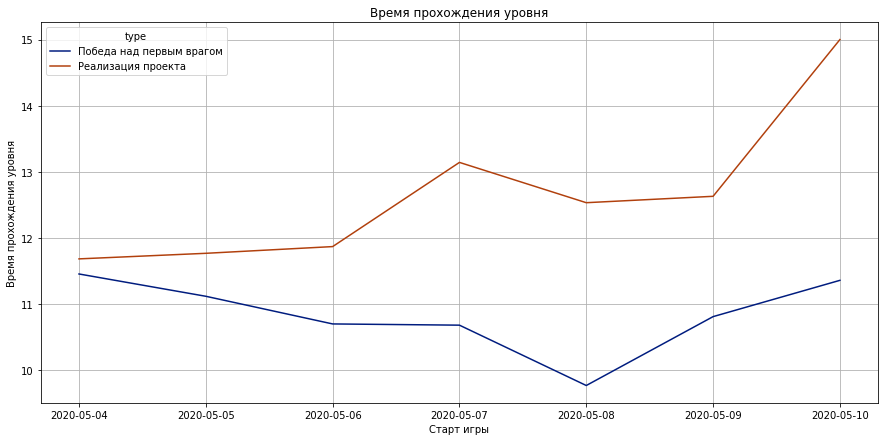

In [52]:
# построим график динамики времени прохождения уровня

merge_game.pivot_table(index ='start_game_day',
                                                columns = 'type', values = 'game_day').plot(grid = True, figsize = (15,7),title='Время прохождения уровня')
plt.xlabel('Старт игры')
plt.ylabel('Время прохождения уровня')
plt.show()

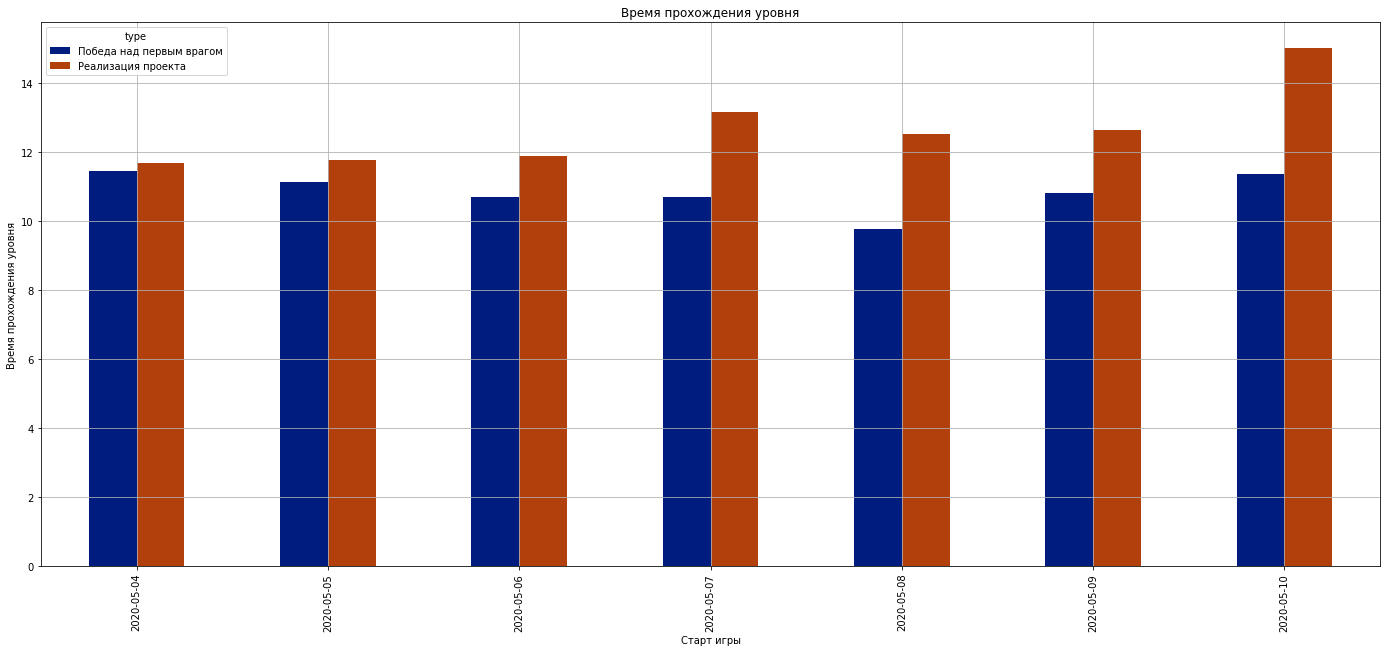

In [53]:
# построим гистограммы

merge_game.pivot_table(index ='start_game_day',
                                                columns = 'type', values = 'game_day').plot(kind = 'bar', grid = True, figsize = (24,10),title='Время прохождения уровня')

plt.xlabel('Старт игры')
plt.ylabel('Время прохождения уровня')
plt.show()

Вывод

На данном шаге подсчитаем среднее время прохождения уровня. Создадим вспомогательный столбец, в котором промаркируем, каким именно способом был завершен первый уровень - победой над врагом или реализацией проекта.

В результате вычислений получаем:

Среднее время прохождения уровня для варианта 'Победа над первым врагом' = 11 days 02:30:24
Медианное время прохождения уровня для варианта "Победа над первым врагом" = 10 days 19:01:37

Среднее время прохождения уровня для варианта "Реализация проекта": 11 days 21:16:06

Медианное время прохождения уровня для варианта "Реализация проекта": 11 days 07:12:24
Таким образом, пользователи завершают первый уровень быстрее, если выбирают вариант победить врага. 

#### Количество построек на каждого пользователя

In [54]:
# сгруппируем датасет по пользователю и посмотрим количество построек на каждого

building_count = game_actions.groupby('user_id').agg({'building_type': 'count'})
building_count.head()

,building_type
user_id,
0001f83c-c6ac-4621-b7f0-8a28b283ac30,13
00151b4f-ba38-44a8-a650-d7cf130a0105,9
001aaea6-3d14-43f1-8ca8-7f48820f17aa,4
001d39dc-366c-4021-9604-6a3b9ff01e25,8
002f508f-67b6-479f-814b-b05f00d4e995,12


In [55]:
# подсчитаем среднее значение количества построек

print('Cреднее значение количества построек на пользователя: {:.2f}'.format(building_count['building_type'].mean()))

Cреднее значение количества построек на пользователя: 9.43


In [56]:
# подсчитаем медианное значение количества построек

print('Медианное значение количества построек на пользователя:', building_count['building_type'].median())

Медианное значение количества построек на пользователя: 10.0


In [57]:
#отберем данные по пользователям, которые завершили уровень победой над врагом для создания фильтра

win_users_type = game_actions.query('type == "Победа над первым врагом"')
win_users_type.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week,type
6659,2020-05-04 19:47:29,finished_stage_1,NaN,ced7b368-818f-48f6-9461-2346de0892c5,NaN,2020-05-04,19,Победа над первым врагом
13134,2020-05-05 13:22:09,finished_stage_1,NaN,7ef7fc89-2779-46ea-b328-9e5035b83af5,NaN,2020-05-05,19,Победа над первым врагом
15274,2020-05-05 18:54:37,finished_stage_1,NaN,70db22b3-c2f4-43bc-94ea-51c8d2904a29,NaN,2020-05-05,19,Победа над первым врагом
16284,2020-05-05 21:27:29,finished_stage_1,NaN,903fc9ef-ba97-4b12-9d5c-ac8d602fbd8b,NaN,2020-05-05,19,Победа над первым врагом
19650,2020-05-06 06:02:22,finished_stage_1,NaN,58e077ba-feb1-4556-a5a0-d96bd04efa39,NaN,2020-05-06,19,Победа над первым врагом


In [58]:
# создадим список пользователей, которые прошли уровень через победу над врагом 

user_win = win_users_type['user_id']

In [59]:
# сформируем новый датасет, где для каждого события укажем к какому варианту прохождения уровня относится

game_actions_type = game_actions

game_actions_type.loc[(game_actions['event'] == "building") 
                  & (game_actions['user_id'].isin(user_win)), 'type'] = 'Победа над первым врагом'   

game_actions_type.loc[(game_actions['event'] == "building") 
                  & (game_actions['user_id'].isin(user_project)), 'type'] = 'Реализация проекта'

game_actions_type.loc[(game_actions['event'] == "building") 
                  & (~game_actions['user_id'].isin(user_project)) & (~game_actions['user_id'].isin(user_win)), 'type'] = 'Первый уровень не завершен'

game_actions_type.loc[(game_actions['event'] == "finished_stage_1") 
                  & (game_actions['user_id'].isin(user_project)), 'type'] = 'Реализация проекта'

game_actions_type.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week,type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,Первый уровень не завершен
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19,Реализация проекта
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,19,Победа над первым врагом
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,19,Первый уровень не завершен
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,19,Победа над первым врагом


In [60]:
# посмотрим, как распределены уникальные пользователи

building_count = game_actions_type.groupby('type').agg({'building_type':'count','user_id':'nunique'}).reset_index().sort_values(by = 'user_id', ascending = False)
building_count['count'] = building_count['building_type'] / building_count['user_id']
building_count

,type,building_type,user_id,count
0,Первый уровень не завершен,67170,7759,8.657043
1,Победа над первым врагом,37185,3951,9.411541
2,Реализация проекта,23601,1866,12.647910


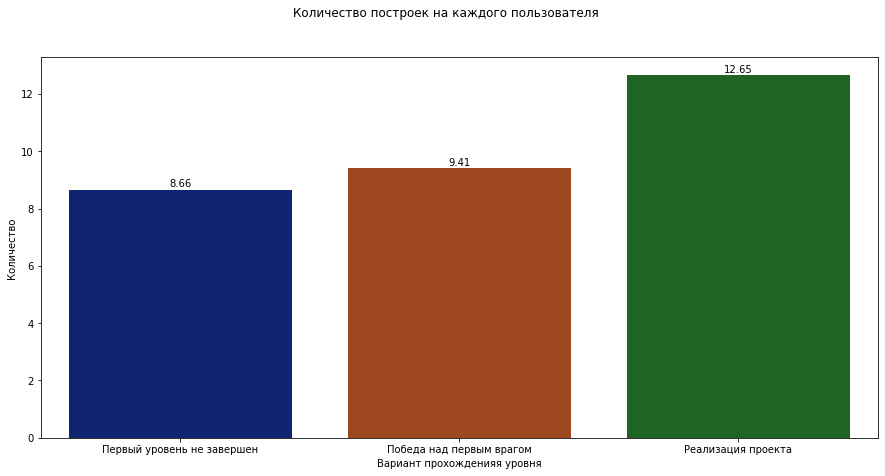

In [61]:
# построим график распределения 

plt.figure(figsize=(15,7))
ax = sns.barplot(data=building_count, x='type', y='count')
plt.suptitle('Количество построек на каждого пользователя')
plt.xlabel('Вариант прохожденияя уровня')
plt.ylabel('Количество')
sns.set_palette('dark') 

#добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.1,
            '{:1.2f}'.format(height),
            ha="center")

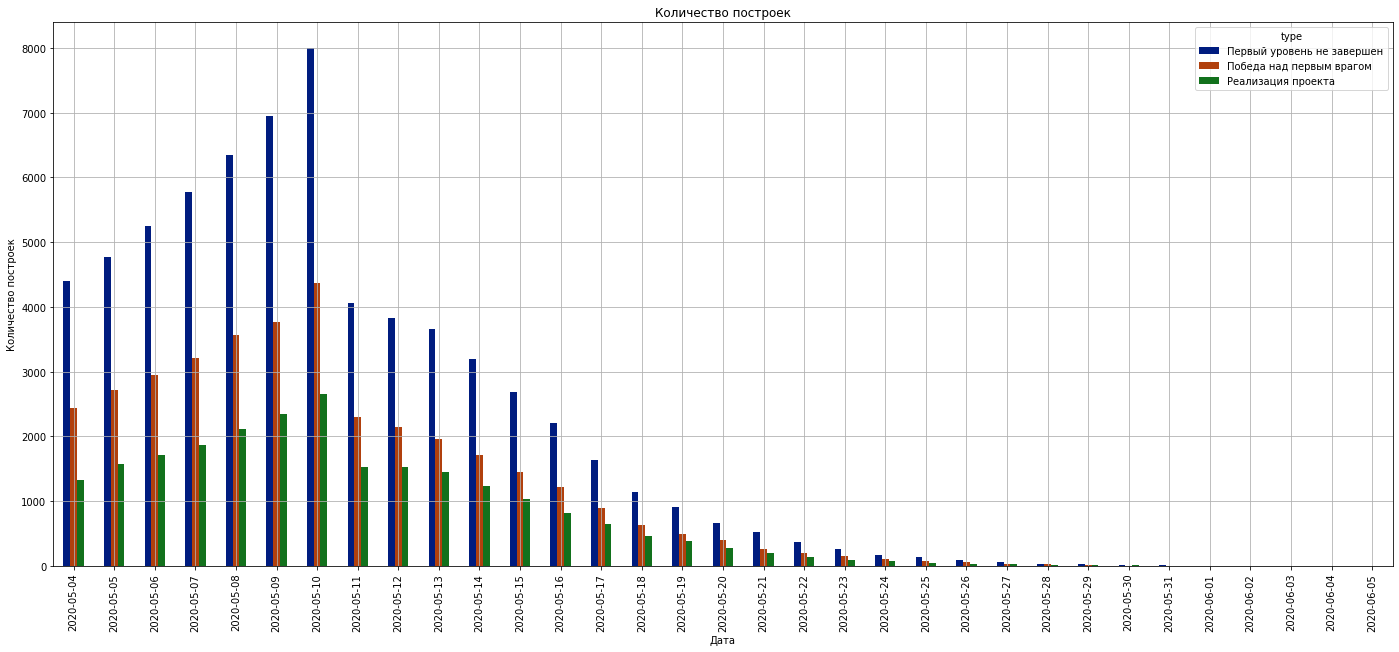

In [62]:
#построим гистограммы

game_actions_type.pivot_table(index ='event_date',
                                                columns = 'type', values = 'building_type', aggfunc = 'count').plot(kind = 'bar', grid = True, figsize = (24,10),title='Количество построек')

plt.xlabel('Дата')
plt.ylabel('Количество построек')
plt.show()

Вывод

Количество построек на пользователя в разрезе варианта прохождения уровня:

Реализация проекта: 12.65
Победа над первым врагом: 9.41
Первый уровень не завершён: 8.66

#### Сколько раз за день пользователи в среднем заходят в мобильное приложение

In [63]:
# рассчитаем количество сессий в день на каждого уникального пользователя

visits_per_user = game_actions.groupby('event_date').agg({'user_id': ['count', 'nunique']})

visits_per_user.columns = ['visits', 'users']
visits_per_user['visits_per_user'] = visits_per_user['visits'] / visits_per_user['users'] 
visits_per_user.mean()

visits             4110.272727
users              2884.878788
visits_per_user       1.333484
dtype: float64

In [64]:
# посмотрим столбец visits_per_user

visits_per_user['visits_per_user'].sort_values(ascending = False).head(10)

event_date
2020-05-10    1.649528
2020-05-09    1.564093
2020-05-08    1.528197
2020-05-07    1.470477
2020-05-06    1.448060
2020-06-04    1.428571
2020-05-05    1.418834
2020-05-04    1.394369
2020-05-12    1.370845
2020-05-11    1.365304
Name: visits_per_user, dtype: float64

In [65]:
# рассчитаем максимальное количество сессий в день на каждого уникального пользователя

print('Максимальное количество сессий в день на каждого уникального пользователя: {:.2f}'.format(visits_per_user['visits_per_user'].max()))

Максимальное количество сессий в день на каждого уникального пользователя: 1.65


In [66]:
# рассчитаем минимальное количество сессий в день на каждого уникального пользователя

print('Минимальное количество сессий в день на каждого уникального пользователя: {:.2f}'. format(visits_per_user['visits_per_user'].min()))

Минимальное количество сессий в день на каждого уникального пользователя: 1.22


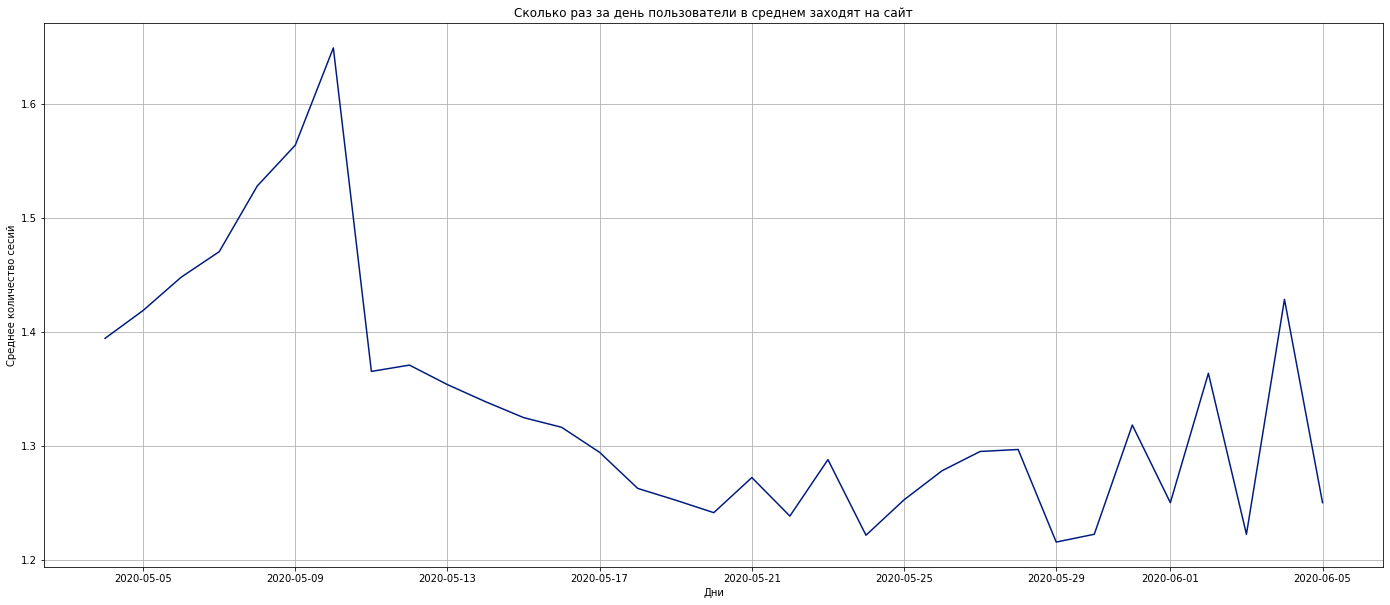

In [67]:
# построим график

visits_per_user['visits_per_user'].plot(grid = True, figsize = (24,10),title='Сколько раз за день пользователи в среднем заходят на сайт')
plt.xlabel('Дни')
plt.ylabel('Среднее количество сесий')
plt.show()

Вывод

Подсчитаем, сколько раз за день пользователи в среднем заходят в мобильное приложение.

Среднее количество сессий в день = 4110
Среднее количество уникальных пользователей в день = 2884
Среднее количество сессий в день на каждого уникального пользователя = 1.33
Максимальное количество сессий в день на каждого уникального пользователя = 1.65
Минимальное количество сессий в день на каждого уникального пользователя = 1.22.

На графике видим, что максимальное количество сессий в день на каждого уникального пользователя приходится на 10 мая. Далее видим снижение до 2021-05-20 , за которым следуют периодические подъемы и снижения, с максимальным падением 2020-05.29 и максимальным подъемом 2020-05.04.Активность пошла на спад после 21-го мая. То есть после привлечения последнего игрока активность медленно падала в течение 11 дней, а дальше стабилизировалась к минимальным показателям.

#### Показатели вовлечённости - DAU, WAU, Sticky Factor

In [68]:
# cгруппируем данные по уникальным пользователям и найдём среднее

# DAU - количество уникальных пользователей в день

dau_total = game_actions.groupby('event_date').agg({'user_id': 'nunique'}).mean()

print('Количество уникальных пользователей в день DAU:', int(dau_total))

Количество уникальных пользователей в день DAU: 2884


In [69]:
# посмотрим количество уникальных пользователей по дням

game_actions.groupby('event_date').agg({'user_id': 'nunique'}).sort_values(by = 'user_id', ascending = False).head()

,user_id
event_date,
2020-05-10,9219
2020-05-09,8394
2020-05-08,7891
2020-05-07,7384
2020-05-06,6854


In [70]:
# WAU - количество уникальных пользователей в неделю

wau_total = game_actions.groupby('event_week').agg({'user_id': 'nunique'}).mean()

print('Количество уникальных пользователей в неделю WAU:', int(wau_total))

Количество уникальных пользователей в неделю WAU: 6120


In [71]:
# рассчитаем метрику Sticky Factor за неделю

sticky_week = int(dau_total) / int(wau_total)
print('Вовлечённость аудитории Sticky Factor за неделю: {:.2%}'.format(sticky_week))

Вовлечённость аудитории Sticky Factor за неделю: 47.12%


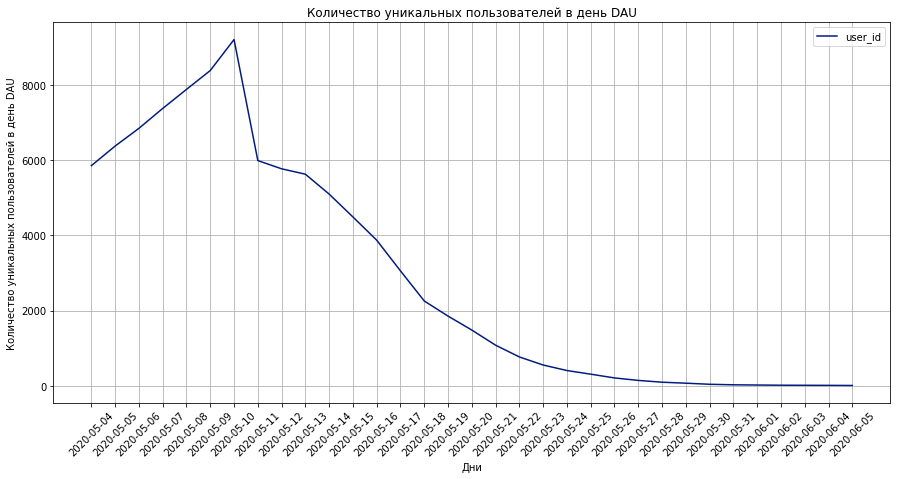

In [72]:
# построим график количества уникальных пользователей в день DAU

game_actions.groupby('event_date').agg({'user_id': 'nunique'}).plot(grid = True, figsize = (15,7),title='Количество уникальных пользователей в день DAU')
plt.xlabel('Дни')
plt.xticks(np.arange(game_actions['event_date'].min(), game_actions['event_date'].max() + pd.to_timedelta('1 day'), pd.to_timedelta('1 day')), rotation = 45)
plt.ylabel('Количество уникальных пользователей в день DAU')
plt.show()


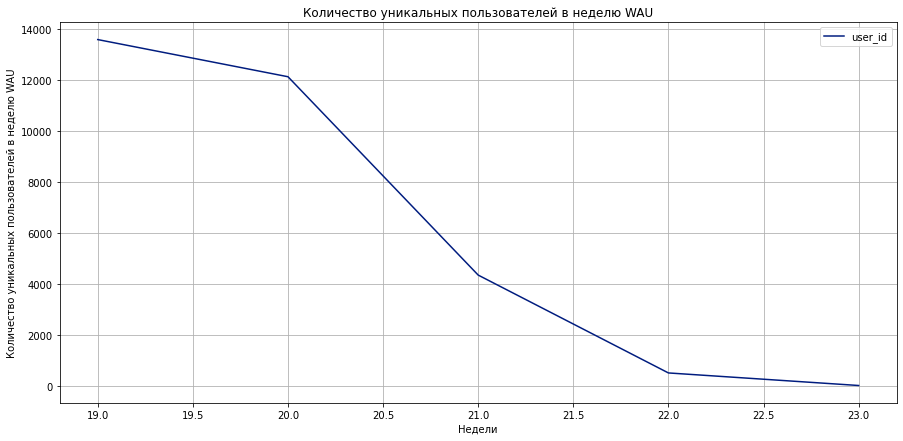

In [73]:
#построим график количества уникальных пользователей в неделю WAU

game_actions.groupby('event_week').agg({'user_id': 'nunique'}).plot(grid = True, figsize = (15,7),title='Количество уникальных пользователей в неделю WAU')
plt.xlabel('Недели')
plt.ylabel('Количество уникальных пользователей в неделю WAU')
plt.show()

Вывод

На данном шаге подсчитаем показатели вовлеченности - количество уникальных пользователей в день DAU, в неделю WAU, Sticky Factor за неделю.

Количество уникальных пользователей в день DAU = 2884 пользователя

Количество уникальных пользователей в неделю WAU = 6120 пользователей

Вовлечённость аудитории Sticky Factor за неделю = 47.12%

Количество уникальных пользователей приходится на каждый день:
- на первом месте 2020-05-10 = 9219 уникальных пользователей
- на втором месте 2020-05-09 = 8394 уникальных пользователя
- на третьем месте 2020-05-08 = 7891 уникальный пользователь

На графиках также видим, что самое большое количество пользователей приходится на 10 мая, и в целом пик приходится на "вторые майские" праздники. Видимо, в честь праздника пользователи решили сразиться с виртуальными врагами. Также по условию задачи нам представлены данные по первому уровню, получается, большинство пользователей прошли уровень к 10 мая, а далее перешли на второй уровень или ушли в отток, и количество пользователей в день закономерно снижается.

Наглядно видим большую информативность DAU над WAU.

#### Коэффициент удержания Retention Rate

Так как не все пользователи проходят первый уровень, для расчета метрики Retention Rate рассмотрим 2 когорты:1)пользователи, окончившие первый уровень (любым способом), 2)пользователи, которые не закончили первый уровень. 

In [74]:
#возьмём дату, когда пользователь впервые проявил активность

first_date = game_actions.groupby(['user_id'])['event_date'].min()

#данные запишем в объект Series

first_date.name = 'first_date'
first_date.head()

user_id
0001f83c-c6ac-4621-b7f0-8a28b283ac30    2020-05-06
00151b4f-ba38-44a8-a650-d7cf130a0105    2020-05-06
001aaea6-3d14-43f1-8ca8-7f48820f17aa    2020-05-05
001d39dc-366c-4021-9604-6a3b9ff01e25    2020-05-05
002f508f-67b6-479f-814b-b05f00d4e995    2020-05-05
Name: first_date, dtype: object

In [75]:
#объединим датафрейм и Series по столбцу 'user_id':

game_actions = game_actions.join(first_date, on='user_id') 

game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week,type,first_date
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,Первый уровень не завершен,2020-05-04
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN,2020-05-04,19,Реализация проекта,2020-05-04
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN,2020-05-04,19,Победа над первым врагом,2020-05-04
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN,2020-05-04,19,Первый уровень не завершен,2020-05-04
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN,2020-05-04,19,Победа над первым врагом,2020-05-04


In [76]:
# выделим из столбцов event_date и first_date день

game_actions['event_day'] = game_actions['event_date'].astype('datetime64[D]')

game_actions['first_day'] = game_actions['first_date'].astype('datetime64[D]')


In [77]:
# рассчитаем lifetime пользователя в рамках когорты


game_actions['cohort_lifetime'] = game_actions['event_day'] - game_actions['first_day']

game_actions['cohort_lifetime'] = game_actions['cohort_lifetime'] / np.timedelta64(1, 'D')

game_actions['cohort_lifetime'] = game_actions['cohort_lifetime'].round().astype('int') 

# сгруппируем данные по когорте и lifetime

cohorts = game_actions.groupby(['first_day','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
cohorts.head()

,first_day,cohort_lifetime,user_id
0,2020-05-04,0,5860
1,2020-05-04,1,3021
2,2020-05-04,2,3204
3,2020-05-04,3,3412
4,2020-05-04,4,3564


In [78]:
# добавим сколько дней пользователь провел в игре
time_in_game = game_actions.groupby('user_id')['cohort_lifetime'].max().reset_index()
time_in_game.columns = ['user_id', 'time_in_game']
game_actions = game_actions.merge(time_in_game, on='user_id')
game_actions.head()

,event_datetime,event,building_type,user_id,project_type,event_date,event_week,type,first_date,event_day,first_day,cohort_lifetime,time_in_game
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,19,Первый уровень не завершен,2020-05-04,2020-05-04,2020-05-04,0,6
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,Первый уровень не завершен,2020-05-04,2020-05-05,2020-05-04,1,6
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,Первый уровень не завершен,2020-05-04,2020-05-05,2020-05-04,1,6
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,19,Первый уровень не завершен,2020-05-04,2020-05-05,2020-05-04,1,6
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,19,Первый уровень не завершен,2020-05-04,2020-05-06,2020-05-04,2,6


In [79]:
# выделим пользователей, которые окончили уровень
users_with_finish = game_actions[game_actions['event'] == 'finished_stage_1'].reset_index(drop=True)
users_with_finish = users_with_finish['user_id']

# пользователи со статусом "первый уровень получен"
finished = game_actions.query('user_id in @users_with_finish').reset_index(drop=True)
# пользователи со статусом "первый уровень не получен"
not_finished = game_actions.query('user_id not in @users_with_finish').reset_index(drop=True)

# выделим пользователей, которые окончили уровень через проект
users_with_project = finished[finished['event'] == 'project'].reset_index(drop=True)
users_with_project = users_with_project['user_id']

# пользователи, получившие первый уровень через проект
finished_with_project = finished.query('user_id in @users_with_project').reset_index(drop=True)
# пользователи, получившие первый уровень через победу над врагами
finished_without_project = finished.query('user_id not in @users_with_project').reset_index(drop=True)


In [80]:
# функция для построения heatmap retention rate
def cohort_heatmap(df, name):
    cohorts = df.groupby(['first_date','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 
    initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_date','user_id']]
    initial_users_count.columns = ['first_date', 'initial_uid']
    cohorts = cohorts.merge(initial_users_count, on='first_date')
    cohorts['retention'] = cohorts['user_id'] / cohorts['initial_uid'] 
    #cohorts['first_event_datetime'] = cohorts['first_event_datetime'].dt.strftime('%Y-%m-%d')
    # считаем Retention по упрощенной формуле
    retention_pivot = cohorts.pivot_table(index='first_date',
                                      columns='cohort_lifetime',
                                      values='retention',
                                      aggfunc='sum') 
    # сделали сводную таблицу по retention и вывели ее для наглядности
    sns.set(font_scale=1.03)
    plt.figure(figsize=(25, 6))
    plt.title(f'Cohorts: User Retention: {name}', fontsize=15)
    sns.heatmap(retention_pivot, annot=True, fmt='.1g', linewidths=.5, linecolor='white', cmap= 'viridis'); 


In [81]:
# выведим процентное отношение между основными группами а также retention rate
def precent_users(df, df2):
    users = df['user_id'].nunique()
    users_2 = df2['user_id'].nunique()
    precent = users_2 / users
    print('{:.1%}'.format(precent))

In [82]:
print('Закончили первый уровень:')
precent_users(game_actions,finished)
print('Не закончили первый уровень:')
precent_users(game_actions, not_finished)


Закончили первый уровень:
42.8%
Не закончили первый уровень:
57.2%


Больше половины пользователей не закончили первый уровень.

Retention Rate пользователей с первым уровнем и пользователей без первого уровня
 


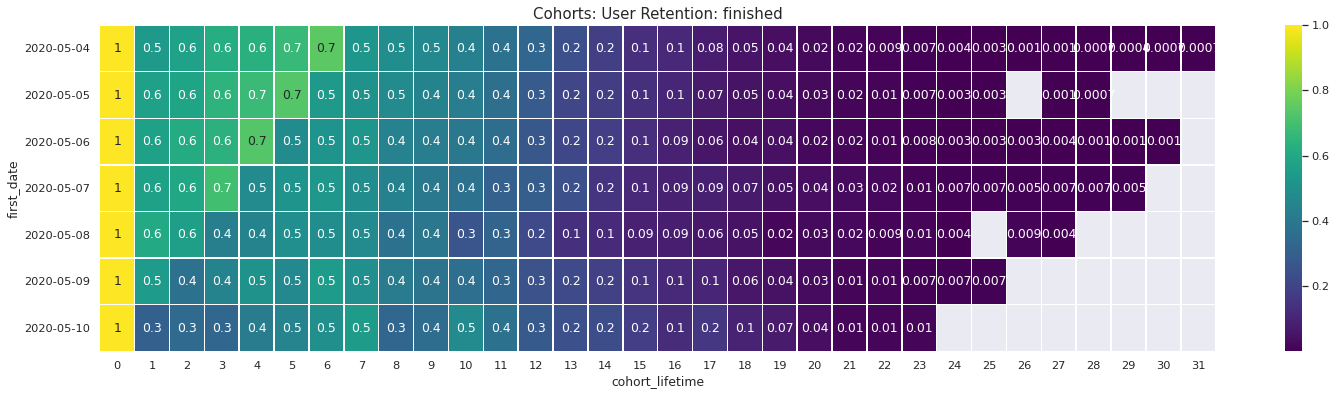

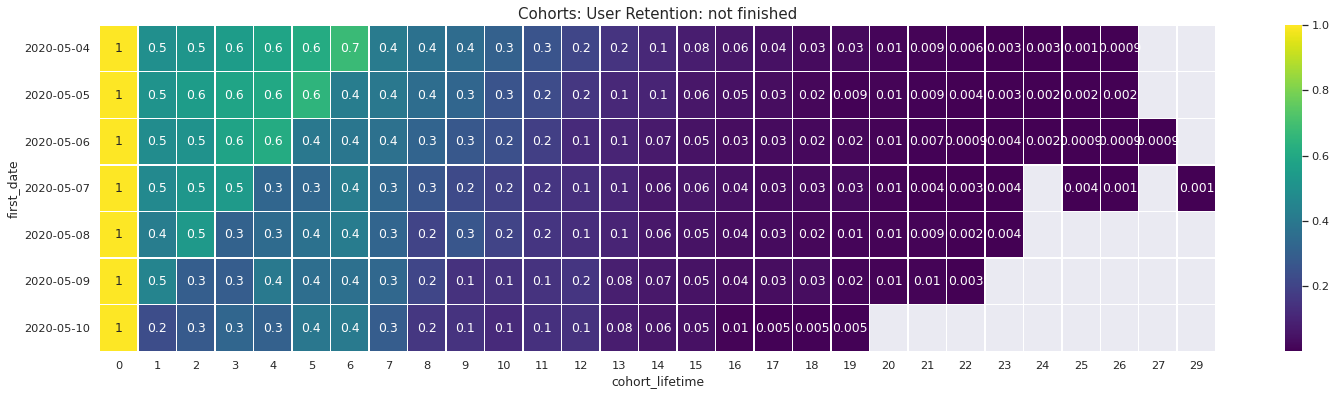

In [83]:
# рассмотрим Retention Rate по кагортам
print('Retention Rate пользователей с первым уровнем и пользователей без первого уровня')
print(' ')
cohort_heatmap(finished, 'finished')
cohort_heatmap(not_finished, 'not finished')

Вывод

Для метрики Retention Rate gредставлено 2 когорты.

     первый тепловой график - пользователи, окончившие первый уровень (любым способом), 
     второй график - пользователи, которые не закончили первый уровень.

На графиках видим: 
- вторая руппа имеет lifetime короче первой. Если пользователи, пришедшие 4 мая и завершившие уровень, еще в малои количестве остаются на 31-й день, то пользователи второй группы пропадают на 27-й день бесследно.

Интересно, что и в первой и второй группе есть когорты, которые пропадают на день и возвращаются снова в небольшом количестве на 2-3 дня.
- В обоих когортах наблюдается тенденция: чем позже пришел пользователь, тем меньше он заинтересован в игре. Так же когорты "вымирает" на 90% к половине lifetime (если lifetime имеет 30 дней, то на 15-й день остнется 10% от изначальных пользователей.

Также видими больше половины потерь от первоначального количества пользователей уже на следующий день, после появления новой когорты. Возможно, что в самой игре не  хватает удержания.

#### Стоимость привлечения клиента CAC

In [84]:
# объединим дополнительные датасеты

ad_costs_source = pd.merge(user_source.groupby('source').agg('count'), ad_costs.groupby('source').agg('sum'), on = ['source'], how = 'inner').reset_index()
ad_costs_source

,source,user_id,cost
0,facebook_ads,2726,2140.904643
1,instagram_new_adverts,3347,2161.441691
2,yandex_direct,4817,2233.111449
3,youtube_channel_reklama,2686,1068.119204


In [85]:
#подсчитаем стоимость привлечения САС

ad_costs_source['CAC'] = ad_costs_source['cost'] / ad_costs_source['user_id'] 
ad_costs_source

,source,user_id,cost,CAC
0,facebook_ads,2726,2140.904643,0.785365
1,instagram_new_adverts,3347,2161.441691,0.645785
2,yandex_direct,4817,2233.111449,0.463590
3,youtube_channel_reklama,2686,1068.119204,0.397662


In [86]:
# подсчитаем среднее значение стоимости привлечения САС

ad_costs_source['CAC'].mean()

0.5731002471448883

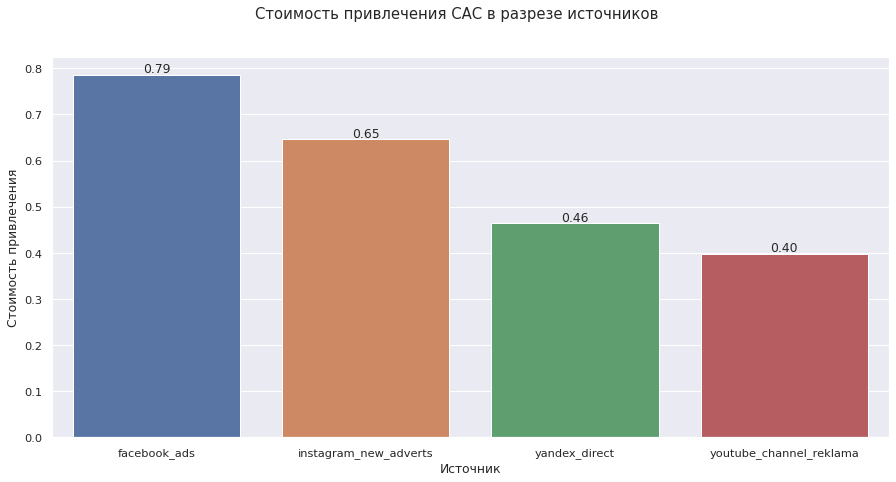

In [87]:
# построим график распределения САС

plt.figure(figsize=(15,7))
ax = sns.barplot(data= ad_costs_source, x='source', y='CAC')
plt.suptitle('Стоимость привлечения САС в разрезе источников')
plt.xlabel('Источник')
plt.ylabel('Стоимость привлечения')
sns.set_palette('dark') 

# добавим подписи

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 0.005,
            '{:.2f}'.format(height),
            ha="center")

**Вывод**

На данном шаге проведен исследовательский анализ данных.

**Cреднее время прохождения уровня**

Среднее время прохождения уровня для варианта 'Победа над первым врагом' = 11 days 02:30:24
Медианное время прохождения уровня для варианта "Победа над первым врагом" = 10 days 19:01:37

Среднее время прохождения уровня для варианта "Реализация проекта": 11 days 21:16:06

Медианное время прохождения уровня для варианта "Реализация проекта": 11 days 07:12:24

Таким образом, пользователи завершают первый уровень быстрее, если выбирают вариант победить врага. 

**Количество построек на каждого пользователя**

Cреднее значение количества построек на пользователя для всего датасета: 9.43
Медианное значение количества построек на пользователя для всего датасета: 10.0

- Cреднее значение количества построек на пользователя в случае победы над врагом: 9.41
- Cреднее значение количества построек на пользователя в случае реализации проекта: 12.00

**Сколько раз за день пользователи в среднем заходят в мобильное приложение**

- Среднее количество сессий в день = 4110
- Среднее количество уникальных пользователей в день = 2884
- Среднее количество сессий в день на каждого уникального пользователя = 1.33
- Максимальное количество сессий в день на каждого уникального пользователя = 1.65
- Минимальное количество сессий в день на каждого уникального пользователя = 1.22

**Показатели вовлечённости - DAU, WAU, Sticky Factor**

- Количество уникальных пользователей в день DAU = 2884 пользователя
- Количество уникальных пользователей в неделю WAU = 6120 пользователей
- Вовлечённость аудитории Sticky Factor за неделю = 47.12%

**Количество уникальных пользователей приходится на каждый день:**

- на первом месте 2020-05-10 = 9219 уникальных пользователей
- на втором месте 2020-05-09 = 8394 уникальных пользователя
- на третьем месте 2020-05-08 = 7891 уникальный пользователь

На графиках также видим, что самое большое количество пользователей приходится на 10 мая, и в целом пик приходится на "вторые майские" праздники. Также по условию задачи нам представлены данные по первому уровню, получается, большинство пользователей прошли уровень к 10 мая, а далее перешли на второй уровень или ушли в отток, и количество пользователей в день закономерно снижается.

**Коэффициент удержания Retention Rate**

Графики Retention Rate по 2 когортам:1)пользователи, окончившие первый уровень (любым способом), 2)пользователи, которые не закончили первый уровень.

- вторая руппа имеет lifetime короче первой. Если пользователи, пришедшие 4 мая и завершившие уровень, еще в малои количестве остаются на 31-й день, то пользователи второй группы пропадают на 27-й день бесследно.
- в обоих когортах наблюдается тенденция: чем позже пришел пользователь, тем меньше он заинтересован в игре. Так же когорты "вымира.т" на 90% к половине lifetime (если lifetime имеет 30 дней, то на 15-й день остнется 10% от изначальных пользователей.
- больше половины потерь от первоначального количества пользователей уже на следующий день, после появления новой когорты. Возможно, что в самой игре не хватает удержания.

**Стоимость привлечения клиента CAC**
Распределение стоимости привлечения пользователей по источникам трафика:

- facebook_ads = 0.79
- instagram_new_adverts = 0.65
- yandex_direct = 0.46
- youtube_channel_reklama = 0.40

Таким образом, самый дорогой способ привлечения пользователей через facebook_ads, а самый бюджетный - через youtube_channel_reklama.

### Шаг 3.  Проверка статистических гипотез

#### Гипотеза различия времени прохождения уровня

Нулевая гипотеза H0 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.

Альтернативная гипотеза H1 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

Критический уровень статистической значимости определим, как alpha = 0.05 

In [88]:
# выделим время прохождения уровня в отдельный столбец и представим в виде одного числа

merge_game['game_day'] = merge_game['game_time'] / np.timedelta64(1, 'D')

merge_game['game_day'] = merge_game['game_day'].round().astype('int') 

merge_game.head()

,user_id,win_game_date,type,start_game_date,game_time,start_game_day,game_day
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,Победа над первым врагом,2020-05-05 21:02:05,6 days 10:38:42,2020-05-05,6
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17 21:47:49,Победа над первым врагом,2020-05-05 08:31:04,12 days 13:16:45,2020-05-05,13
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16 19:57:40,Победа над первым врагом,2020-05-04 01:07:35,12 days 18:50:05,2020-05-04,13
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15 16:02:01,Победа над первым врагом,2020-05-04 08:35:29,11 days 07:26:32,2020-05-04,11
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16 13:48:39,Победа над первым врагом,2020-05-10 11:49:47,6 days 01:58:52,2020-05-10,6


In [89]:
# отберем данные для каждого уровня

p_win = merge_game[merge_game['type'] == "Победа над первым врагом"]['game_day']
p_project = merge_game[merge_game['type'] == "Реализация проекта"]['game_day']

In [90]:
# среднее каждой выборки

print('Среднее время прохождения уровня для данных p_win: {:.2f}'.format(merge_game[merge_game['type'] == "Победа над первым врагом"]['game_day'].mean()))

print('Среднее время прохождения уровня для данных p_project: {:.2f}'.format(merge_game[merge_game['type'] == "Реализация проекта"]['game_day'].mean()))

Среднее время прохождения уровня для данных p_win: 11.11
Среднее время прохождения уровня для данных p_project: 11.88


In [91]:
# cравним дисперсии двух выборок

print('Значение дисперсии для выборки p_win: {:.2f}'.format(p_win.var()))

print('Значение дисперсии для выборки p_project: {:.2f}'.format(p_project.var()))

print('Разница дисперсий: {:.2%}'.format((p_win.var()-p_project.var())/ p_win.var()))

print()

# проверим гипотезу о равенстве среднего двух генеральных совокупностей

results = st.ttest_ind(p_win, p_project, equal_var = False)

# критический уровень статистической значимости

alpha = 0.05 

# для проверки используем критерий p-value

print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение дисперсии для выборки p_win: 16.85
Значение дисперсии для выборки p_project: 13.35
Разница дисперсий: 20.79%

p-значение: 7.444371631883923e-13
Принимаем альтернативную гипотезу


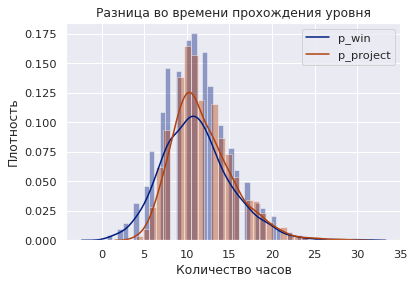

In [92]:
# построим гистограмму по результату теста
sns.distplot(p_win);
sns.distplot(p_project);
plt.title('Разница во времени прохождения уровня')
plt.xlabel('Количество часов')
plt.ylabel('Плотность')
plt.legend(['p_win', 'p_project'])
plt.show()

#### Гипотеза различия количества построенных зданий

Нулевая гипотеза H0 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.

Альтернативная гипотеза H1 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

Критический уровень статистической значимости определим, как alpha = 0.05 

In [93]:
# отберем все данные по пользователям, которые завершили уровень победой над врагом

win_building = game_actions_type[game_actions_type['user_id'].isin(user_project)]

# подсчитаем количество построенных зданий для каждого пользователя

building_type_win = win_building.groupby('user_id').agg({'building_type':'count'}).reset_index()
building_type_win.head()

,user_id,building_type
0,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,11
1,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,12
2,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,11
3,00de2809-403e-4476-a2f7-ca1b11700190,13
4,00e83261-5fd4-4939-9616-802b5a0202c6,13


In [94]:
# отберем все данные по пользователям, которые завершили уровень реализацией проекта

project_building = game_actions_type[game_actions_type['user_id'].isin(user_win)]

# подсчитаем количество построенных зданий для каждого пользователя

building_type_project = project_building.groupby('user_id').agg({'building_type':'count'}).reset_index()
building_type_project.head()

,user_id,building_type
0,001d39dc-366c-4021-9604-6a3b9ff01e25,8
1,003ee7e8-6356-4286-a715-62f22a18d2a1,8
2,004074f8-251a-4776-922c-8348dca1a2f6,12
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,8
4,0056c007-c082-43cc-bdef-afc49bca4cb9,3


In [95]:
# отберем данные для каждого уровня

p_win_building = building_type_win['building_type']
p_project_building = building_type_project['building_type']

In [96]:
# подсчитаем среднее значение количества построек

print('Cреднее значение количества построек на пользователя для данных p_win_building: {:.2f}'.format(building_type_win['building_type'].mean()))

print('Cреднее значение количества построек на пользователя для данных p_project_building: {:.2f}'.format(building_type_project['building_type'].mean()))

Cреднее значение количества построек на пользователя для данных p_win_building: 12.65
Cреднее значение количества построек на пользователя для данных p_project_building: 9.41


In [97]:
# cравним дисперсии двух выборок

print('Значение дисперсии для выборки p_win_building:', p_win_building.var())

print('Значение дисперсии для выборки p_project_building:', p_project_building.var())

print('Разница дисперсий: {:.2%}'.format((p_project_building.var()-p_win_building.var())/ p_project_building.var()))

print()

# проверим гипотезу о равенстве среднего двух генеральных совокупностей
 
results = st.ttest_ind(p_win_building, p_project_building, equal_var = False)

# критический уровень статистической значимости

alpha = 0.05 

# для проверки используем критерий p-value

print('p-значение:', results.pvalue)

# сравним получившееся p-значение с заданным уровнем статистической значимости

if results.pvalue < alpha:
    print('Принимаем альтернативную гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Значение дисперсии для выборки p_win_building: 4.676502331836245
Значение дисперсии для выборки p_project_building: 9.360717395692165
Разница дисперсий: 50.04%

p-значение: 0.0
Принимаем альтернативную гипотезу


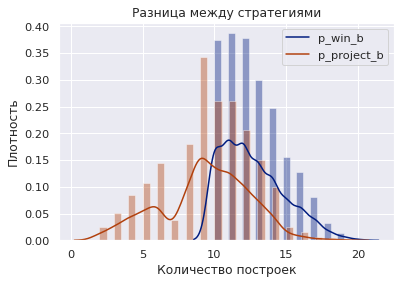

In [98]:
# построим гистограмму по результатам теста
sns.distplot(p_win_building);
sns.distplot(p_project_building);
plt.title('Разница между стратегиями')
plt.xlabel('Количество построек')
plt.ylabel('Плотность')
plt.legend(['p_win_b', 'p_project_b'])
plt.show()

**Вывод**

На данном шаге проверены статистические гипотезы.

**Гипотеза различия времени прохождения уровня**

Нулевая гипотеза H0 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.
Альтернативная гипотеза H1 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

- p-значение: 7.444371631883923e-13, что дает нам право приниять альтернативную гипотезу - среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.Что подтверждается графически.

**Гипотеза различия количества построенных зданий**

Нулевая гипотеза H0 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.

Альтернативная гипотеза H1 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.

- p-значение: 0.0 , что дает нам право приниять альтернативную гипотезу - среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает. Видим подтверждение на соответствующем графике.

### Шаг 4. Формулирование модели монетизации и выводов

#### Модель монетизации

Тесты подтвердили, что среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, а так же время их прохождения не совпадают.

В соотвествии с проведённым выше исследованием сформулируем модель монетизации.

По условию предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. Придерживаемсяя данной концепции.

Стоимость привлечения клиента считаем равной 0.57.
За среднее значение количества построек на пользователя будем считать равным 10.

Если мы будем показывать рекламу на каждом экране с выбором типа объекта для постройки, значит стоимость рекламы должна составлять не менее 0.57/10 = 0.06, чтобы окупить расходы. С учетом ожидаемого 10% оттока пользователей из-за показа рекламы (данные из интернета), стоимость рекламы должна составлять не менее 0.06/0.9 = 0.066. Если мы будем показывать рекламу через раз (на 5 объектах из 10), стоимость рекламы  ворастает в 2 раза.

Таким образом, стоимость рекламы должна составлять:

- 0.066 - если размещать рекламу каждом экране с выбором типа объекта для постройки.

По возможности время запуск нового этапа лучше начинать с праздничных или выходных дней, так как это потенциально увечивает количество пользователей. 

Что касается особенности поведения пользователей, то мы видим 57.2%  это пользователи, не окончившие 1 уровень (который длится в среднем 10-11 дней)  и имеет более короткий lifetime, чем пользователи прошедшие первый уровень. Поэтому, возможно стоит сократить время прохождения первого уровня, так как долгое прохождение и вливание в игру отрицательно сказываясь на удержании в игре, а более длительное прохождение реализовать на последующих уровнях.

#### Общий вывод

В рамках данного проекта необходимо было проанализировать поведение первых пользователей мобильной игры, выявить особенности поведения и выбрать для бизнеса оптимальное время для запуска рекламы. По условию задачи создатели игры планируют показывать её на экране выбором постройки.

В качестве исходных данных были предоставлен датасет game_actions с данными первых пользователей приложения и два дополнительных датасета с информацией о рекламных активностях (ad_costs, user_source).

Целевое событие - завершение первого уровня.

Исследование проводили в несколько шагов.

Шаг  **Подготовка данных к исследованию**

На первом шаге и изучили общую информацию по каждой таблице. Проверили таблицы на наличие пропущенных значений и дубликатов и подготовили данные к исследованию.

При этом по условию задачи сказано, что в датасете содержатся данные первых пользователей приложения — когорты пользователей, которые начали пользоваться приложением в период с 4 по 10 мая включительно.

По условию задачи в датасете представлены данные по игре пользователей на первом уровне, и завершение первого уровня требует от игрока выполнения одного из двух условий:
- Победа над первым врагом
- Реализация проекта - разработка орбитальной сборки спутников.

Резюмируя, первый уровень завершён finished_stage_1 у 5817 пользователей. Процент завершивших первый уровень составляет 42.85%. Из них 1866 пользователей завершили уровень через реализацию проекта project (разработку орбитальной сборки спутников). А 5817 - 1866 = 3951 завершили уровень через победу над первым врагом. Т.е. способ прохождения уровня через победу над врагом пользователи предпочитают больше, чем разработку орбитальной сборки спутников.

Период, за который представлены данные в столбце, - с 3 мая по 9 мая 2020 включительно:

    - Максимальное значение даты и времени - 2020-05-03
    - Максимальное значение даты и времени - 2020-05-09

Наибольший дневной бюджет канала приходится на источники трафика:

    - yandex_direct = 2233.11
    - instagram_new_adverts = 2161.44
    - facebook_ads = 2140.90
    - youtube_channel_reklama = 1068.11

Аналогично распределению дневного бюджета, больше всего пользователей приходится на источник трафика yandex_direct, на втором месте instagram_new_adverts, на третьем месте facebook_ads, а меньше всего - на youtube_channel_reklama.

Шаг  **Исследовательский анализ данных**

*Cреднее время прохождения уровня*

- Среднее время прохождения уровня для варианта 'Победа над первым врагом' = 11 days 02:30:24
- Медианное время прохождения уровня для варианта "Победа над первым врагом" = 10 days 19:01:37

- Среднее время прохождения уровня для варианта "Реализация проекта": 11 days 21:16:06
- Медианное время прохождения уровня для варианта "Реализация проекта": 11 days 07:12:24

Таким образом, пользователи завершают первый уровень быстрее, если выбирают вариант победить врага.

*Количество построек на каждого пользователя*

Количество построек на пользователя в разрезе варианта прохождения уровня:

- Реализация проекта: 12.65
- Победа над первым врагом: 9.41
- Первый уровень не завершён: 8.66
- Сколько раз за день пользователи в среднем заходят в мобильное приложение

- Среднее количество сессий в день = 4110
- Среднее количество уникальных пользователей в день = 2884
- Среднее количество сессий в день на каждого уникального пользователя = 1.33
- Максимальное количество сессий в день на каждого уникального пользователя = 1.65
- Минимальное количество сессий в день на каждого уникального пользователя = 1.22

*Показатели вовлечённости - DAU, WAU, Sticky Factor*
- Количество уникальных пользователей в день DAU = 2884 пользователя
- Количество уникальных пользователей в неделю WAU = 6120 пользователей
- Вовлечённость аудитории Sticky Factor за неделю = 47.12%

Количество уникальных пользователей приходится на каждый день:
1) 2020-05-10 = 9219 , 2)2020-05-09 = 8394, 3) 2020-05-08 = 7891

- На графиках также видим, что самое большое количество пользователей приходится на 10 мая, и в целом пик приходится на "вторые майские" праздники. Видимо, в честь праздника пользователи решили сразиться с виртуальными врагами. Также по условию задачи нам представлены данные по первому уровню, получается, большинство пользователей прошли уровень к 10 мая, а далее перешли на второй уровень или ушли в отток, и количество пользователей в день закономерно снижается.

*Коэффициент удержания Retention Rate*

рафики Retention Rate по 2 когортам:1)пользователи, окончившие первый уровень (любым способом) -42.8%, 2)пользователи, которые не закончили первый уровень - 57.2%.
 
Гуппа "пользователей без первого уровня" имеет lifetime короче первой. Если пользователи, пришедшие 4 мая и завершившие уровень, еще в малои количестве остаются на 31-й день, то пользователи второй группы пропадают на 27-й день бесследно.

В обоих когортах наблюдается тенденция: чем позже пришел пользователь, тем меньше он заинтересован в игре. Так же когорты "вымирают" на 90% к половине lifetime (если lifetime имеет 30 дней, то на 15-й день остнется 10% от изначальных пользователей.

Больше половины потерь от первоначального количества пользователей уже на следующий день, после появления новой когорты. Возможно, что в самой игре не хватает удержания.

*Стоимость привлечения клиента CAC*

Распределение стоимости привлечения пользователей по источникам трафика составило:
- facebook_ads = 0.79
- instagram_new_adverts = 0.65
- yandex_direct = 0.46
- youtube_channel_reklama = 0.40

Таким образом, самый дорогой способ привлечения пользователей через facebook_ads, а самый бюджетный - через youtube_channel_reklama.

Шаг  **Проверка статистических гипотез**

*Гипотеза различия времени прохождения уровня*

-Нулевая гипотеза H0 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.
-Альтернативная гипотеза H1 - Среднее время прохождения уровня между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.
p-значение: 7.444371631883923e-13. Приняли альтернативную гипотезу.

*Гипотеза различия количества построенных зданий*

- Нулевая гипотеза H0 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, совпадает.
- Альтернативная гипотеза H1 - Среднее количество построенных зданий между пользователями, которые заканчивают уровень через реализацию проекта, и пользователями, которые заканчивают уровень победой над другим игроком, не совпадает.
p-значение: 0.0. Принияли альтернативную гипотезу.

Шаг  **Модель монетизации**

По условию предполагается, что в приложении будет происходить показ рекламы на экране с выбором типа объекта для постройки. Придерживаемсяя данной концепции.

Стоимость привлечения клиента считаем равной 0.57. За среднее значение количества построек на пользователя будем считать равным 10.

Если мы будем показывать рекламу на каждом экране с выбором типа объекта для постройки, значит стоимость рекламы должна составлять не менее 0.57/10 = 0.06, чтобы окупить расходы. С учетом ожидаемого 10% оттока пользователей из-за показа рекламы (данные из интернета), стоимость рекламы должна составлять не менее 0.06/0.9 = 0.066. Если мы будем показывать рекламу через раз (на 5 объектах из 10), стоимость рекламы ворастает в 2 раза.

Таким образом, стоимость рекламы должна составлять:

0.066 - если размещать рекламу на каждом экране с выбором типа объекта для постройки.

По возможности время запуск нового этапа лучше начинать с праздничных или выходных дней, так как это потенциально увечивает количество пользователей. 

Самый выгодный источник, по стоимости окупаемости размещенной рекламы -youtube_channel_reklama = 0.42. 

Что касается особенности поведения пользователей, то мы видим 57.2%  это пользователи, не окончившие 1 уровень (который длится в среднем 10-11 дней)  и имеет более короткий lifetime, чем пользователи прошедшие первый уровень. Поэтому, возможно стоит сократить время прохождения первого уровня, так как долгое прохождение и вливание в игру отрицательно сказываясь на удержании в игре, а более длительное прохождение реализовать на последующих уровнях.